In [1]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist
from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
from pathlib import Path

In [2]:
path_corpus = Path('../../data/corpora/tutby_126784.csv')

# path_emb = Path('../../data/emb/emb_tutby_126784_bert.npy')  # 0.283 0.342 | 0.453 (with -mean 0.545)
# path_emb = Path('../../data/emb/emb_tutby_126784_bert_ppa2.npy')  # 0.866 1.0 | 0.599
# path_emb = Path('../../data/emb/emb_tutby_126784_bert_ppa4.npy')  # 0.886 1.0 | 0.599
# path_emb = Path('../../data/emb/emb_tutby_126784_bert_umap5.npy')  # 0.076 0.104 | 0.432
# path_emb = Path('../../data/emb/emb_tutby_126784_bert_ppa2_umap5.npy')  # 0.029 0.061 | 0.522

# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v.npy')  # 0.739 0.821 | 0.523
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v_ppa2.npy')  # 0.906 1.0 | 0.584
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v_umap5.npy')  # 0.230 0.377 | 0.598
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v_ppa2_umap5.npy')  # 0.063 0.119 | 0.656
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v_v2.npy')  # 0.871 0.955 | 0.670 t0.611
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v_v2_ppa2.npy')  # 0.926 1.0 | 0.647
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v_v2_umap5.npy')  # 0.055 0.101 | 0.679
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_d2v_v2_ppa2_umap5.npy')  # 0.063 0.107 | 0.624  t0.577

# path_emb = Path('../../data/emb/emb_clean_tutby_126784_w2v_idf.npy')  # 0.285 0.420 | 0.588 (with -mean 0.138)
path_emb = Path('../../data/emb/emb_clean_tutby_126784_w2v_idf_ppa2.npy')  # 0.763 0.996 | 0.690 t0.604
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_w2v_idf_umap5.npy')  # 0.048 0.103 | 0.574 t0.546
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_w2v_idf_ppa2_umap5.npy')  # 0.036 0.076 | 0.596 t0.535

# path_emb = Path('../../data/emb/emb_tutby_126784_header_bert.npy')  # 0.555 0.635 | 0.391
# path_emb = Path('../../data/emb/emb_tutby_126784_header_sbert.npy')  # 0.388 0.470 | 0.353 t0.317
# path_emb = Path('../../data/emb/emb_clean_tutby_126784_header_w2v_idf.npy')  # 0.601 0.682 | 0.495 t0.467

In [3]:
data = pd.read_csv(path_corpus)

data['tags'] = data['tags'].apply(eval)
data['tags'] = data['tags'].apply(lambda tags: [tag.lower().strip() for tag in tags])

print(data.shape)
display(data.head(5))

(126784, 6)


,url,label,header,date,document,tags
0,https://news.tut.by/550306.html,Футбол,"Тренер ""Шахтера"": Оправдываться не хочу. Все в...",2017-07-06T21:35:00+03:00,Главный тренер солигорского «Шахтера» Олег Куб...,[футбол]
1,https://news.tut.by/550307.html,Общество,"""Зацветет"" ли каменная роза на ул. Комсомольск...",2017-07-07T09:25:00+03:00,Планы по восстановлению рисунка есть. Но пока ...,"[архитектура, живопись, жкх]"
2,https://news.tut.by/550308.html,Общество,Фотофакт. Скамейка в виде пожарной машины появ...,2017-07-07T09:27:00+03:00,Областное управление МЧС ко Дню пожарной служб...,[министерства]
3,https://news.tut.by/550309.html,Футбол,Станислав Драгун дебютировал за БАТЭ в матче с...,2017-07-06T22:11:00+03:00,Чемпион Беларуси БАТЭ воспользовался паузой в ...,"[футбол, батэ]"
4,https://news.tut.by/550310.html,В мире,Генпрокурор Украины пообещал открыть уголовное...,2017-07-06T22:28:00+03:00,Генпрокуратура Украины откроет уголовное произ...,"[ситуация в украине, государственные перевороты]"


In [4]:
with open(path_emb, 'rb') as file:
    embeddings = np.load(file)
    
index = np.isnan(embeddings).any(axis=1)
    
print(embeddings.shape)
print(index.sum())

data = data[~index]
embeddings = embeddings[~index]

# embeddings = embeddings - embeddings.mean(axis=0)  #

print(data.shape)
print(embeddings.shape)

(126784, 300)
11
(126773, 6)
(126773, 300)


# P(D<x|same)

In [5]:
# TODO sampling

tags = data['tags'].explode().value_counts().index

dist_sum = 0.0
n_dists = 0

dists_sample_sim = []

for tag in tqdm(tags[::-1]):
    
    index = data['tags'].map(lambda _: tag in _)
    emb = embeddings[index]
    
    k = int(0.25 * len(emb)) + 1
    emb = np.random.permutation(emb)[:k]
    
    dists = cdist(emb, emb, metric='cosine')
    
    dist_sum += dists.sum()
    n_dists += dists.shape[0] ** 2 - dists.shape[0]
    dists_sample_sim += [dists]
    
dist_mean = dist_sum / n_dists
print(dist_mean)

dists_sample_sim = [_.flatten() for _ in dists_sample_sim]
dists_sample_sim = np.concatenate(dists_sample_sim)


0.7637918822876992


# P(D<x)

In [6]:
%%time  
# TODO pairs sampling

index0 = np.random.permutation(len(embeddings))[:10000]
index1 = np.random.permutation(len(embeddings))[:10000]

dists_sample = cdist(embeddings[index0], embeddings[index1], metric='cosine')

dists_sample = dists_sample.flatten()

dist_mean_ = dists_sample.mean()
print(dist_mean_)

0.996170833001124
Wall time: 38.8 s


# P(same)

In [7]:
%%time

tags0 = data['tags'].iloc[index0].values
tags1 = data['tags'].iloc[index1].values

n_sim = sum(len(set(tag0) & set(tag1)) > 0 for tag0 in tags0 for tag1 in tags1)

p_sim = n_sim / (len(tags0) * len(tags1))

print(p_sim)

0.05253409
Wall time: 1min 39s


# P(same|D<x)

In [8]:
%%time

a = np.quantile(dists_sample, 0.01)
index_sim = np.argwhere(dists_sample < a)[:, 0]

index0_sim = index0[index_sim // len(index0)]
index1_sim = index1[index_sim % len(index1)]

tags0 = data['tags'].iloc[index0_sim]
tags1 = data['tags'].iloc[index1_sim]

is_sim = np.array([len(set(a) & set(b)) > 0 for a, b in zip(tags0, tags1)])

p = sum(is_sim) / len(index_sim)

print(p)

0.604498
Wall time: 5.28 s


# P(D<x), P(D<x|same)

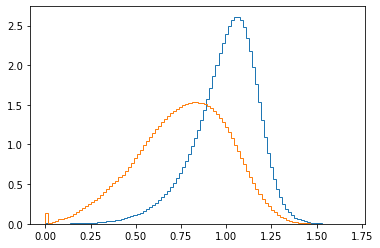

In [9]:
plt.hist(dists_sample, bins=100, density=True, histtype='step')
plt.hist(dists_sample_sim, bins=100, density=True, histtype='step')
plt.show()

In [10]:
%%time

ecdf = ECDF(dists_sample)
ecdf_sim = ECDF(dists_sample_sim)

# plt.plot(ecdf.x, ecdf.y)
# plt.plot(ecdf_sim.x, ecdf_sim.y)
# plt.show()

Wall time: 46.9 s


# P(same|D<x)

0.47225305851431787 1.197313725202464
score: 0.6903622627271123


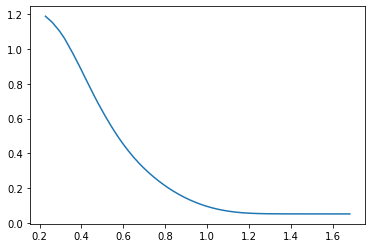

Wall time: 13 s


In [11]:
%%time

a = np.quantile(dists_sample, 0.01)
b = np.quantile(dists_sample, 0.90)
print(a, b)

p_sim_left = p_sim * ecdf_sim(a) / ecdf(a)  # P(same|D<x) = P(same) * P(D<x|same) / P(D<x)
p_sim_right = p_sim * (1.0 - ecdf_sim(b)) / (1.0 - ecdf(b))  # P(same|D>x) = P(same) * P(D>x|same) / P(D>x)
score = p_sim_left - p_sim_right  # todo remove p_sim_right
print(f'score: {score}')

a = np.quantile(dists_sample, 0.001)
b = dists_sample.max()
d = np.linspace(a, b, num=1000)
pp = p_sim * ecdf_sim(d) / ecdf(d)
# ppp = p_sim * (1.0 - ecdf_sim(d)) / (1.0 - ecdf(d))

plt.plot(d, pp)
plt.show()
# plt.plot(d, ppp)
# plt.show()